# 1. Tải và import thư viện

In [5]:
# !pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

^C


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Nhận diện và vẽ keypoints bằng mediapipe holistic

In [3]:
mp_hands = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break when type 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
# results

In [ ]:
# draw_landmarks(frame, results)

In [ ]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Lấy ra các giá trị keypoints

In [ ]:
# len(results.left_hand_landmarks.landmark)

In [ ]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [ ]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [7]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [10]:
# result_test = extract_keypoints(results)

In [11]:
# result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 468*3+33*4+21*3+21*3

In [ ]:
# np.save('0', result_test)

In [ ]:
# np.load('0.npy')

# 4. Thiết lập folder để lấy dữ liệu

In [202]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['xin chao', 'cam on', 'toi yeu ban', 'ban khoe khong', 'ban ten gi',
                    'toi so', 'toi no roi', 'toi rat vui', 'toi 16 tuoi', 'toi muon noi chuyen'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [203]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Lấy các giá trị keypoints để train và test

In [35]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Xử lý dữ liệu và gắn label

In [10]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical



In [204]:
label_map = {label:num for num, label in enumerate(actions)}

In [205]:
label_map

{'xin chao': 0,
 'cam on': 1,
 'toi yeu ban': 2,
 'ban khoe khong': 3,
 'ban ten gi': 4,
 'toi so': 5,
 'toi no roi': 6,
 'toi rat vui': 7,
 'toi 16 tuoi': 8,
 'toi muon noi chuyen': 9}

In [206]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [207]:
print(actions.shape[0])

10


In [208]:
np.array(sequences).shape

(300, 30, 126)

In [209]:
np.array(labels).shape

(300,)

In [210]:
X = np.array(sequences)

In [211]:
X.shape

(300, 30, 126)

In [212]:
y = to_categorical(labels).astype(int)

In [213]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [215]:
X_train.shape

(285, 30, 126)

In [216]:
X_test.shape

(15, 30, 126)

In [217]:
y_test.shape

(15, 10)

# 7. Xây dựng và train LSTM Neural Network

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [83]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [218]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [97]:
res = [.7, 0.2, 0.1]

In [98]:
actions[np.argmax(res)]

'xin chao'

In [219]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
9/9 [==============================] - 6s 147ms/step - loss: 2.2374 - categorical_accuracy: 0.2351
Epoch 2/1000
9/9 [==============================] - 1s 103ms/step - loss: 1.9219 - categorical_accuracy: 0.2632
Epoch 3/1000
9/9 [==============================] - 1s 113ms/step - loss: 1.8576 - categorical_accuracy: 0.3088
Epoch 4/1000
9/9 [==============================] - 1s 95ms/step - loss: 1.8626 - categorical_accuracy: 0.3439 0s - loss: 1.8977 - categorical_accura
Epoch 5/1000
9/9 [==============================] - 1s 96ms/step - loss: 1.7019 - categorical_accuracy: 0.3544
Epoch 6/1000
9/9 [==============================] - 1s 120ms/step - loss: 1.5392 - categorical_accuracy: 0.4491
Epoch 7/1000
9/9 [==============================] - 1s 97ms/step - loss: 1.6293 - categorical_accuracy: 0.4877
Epoch 8/1000
9/9 [==============================] - 1s 93ms/step - loss: 1.3977 - categorical_accuracy: 0.4667
Epoch 9/1000
9/9 [==============================] - 1s 73ms/step - lo

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            48896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 203,690
Trainable params: 203,690
Non-trainable params: 0
________________________________________________

# 8. Dự đoán bằng hàm predict()

In [44]:
res = model.predict(X_test)


In [45]:
actions[np.argmax(res[4])]

'toi 16 tuoi'

In [46]:
actions[np.argmax(y_test[4])]

'toi rat vui'

# 9. Save Weights

In [20]:
from keras.models import load_model

In [47]:
model.save('BestModel.h5')

In [193]:
del model

In [220]:
model.load_weights('Models/BestModel.h5')

In [64]:
model = load_model('Models/action.h5')

NameError: name 'load_model' is not defined

# 10. Ước lượng bằng Confusion Matrix

In [175]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [221]:
yhat = model.predict(X_test)

In [222]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [223]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  1]],

       [[12,  0],
        [ 0,  3]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[12,  0],
        [ 0,  3]]], dtype=int64)

In [224]:
accuracy_score(ytrue, yhat)

1.0

In [225]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytrue, yhat)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 3]]


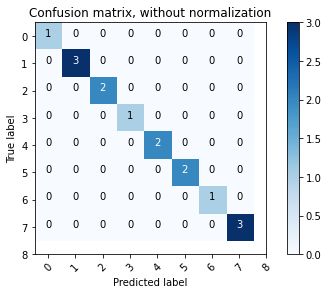

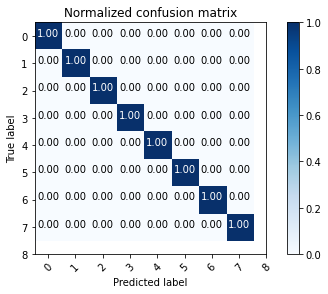

In [261]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# 11. Test 

In [112]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [100]:
import time

In [39]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [100]:
sequence.reverse()

In [102]:
len(sequence)

30

In [103]:
sequence.append('def')

In [104]:
sequence.reverse()

In [105]:
sequence[-30:]

[array([ 0.62733257,  0.44471735, -0.69024068, ...,  0.40363967,
         0.28696212, -0.06274992]),
 array([ 0.62688404,  0.4438577 , -0.73676074, ...,  0.40629318,
         0.28771287, -0.05781016]),
 array([ 0.62661999,  0.44294813, -0.7216031 , ...,  0.40591961,
         0.28609812, -0.06014785]),
 array([ 0.62655252,  0.44137394, -0.65666282, ...,  0.40555608,
         0.28700155, -0.06166872]),
 array([ 0.6264345 ,  0.43732077, -0.64333224, ...,  0.40387231,
         0.28911069, -0.06399857]),
 array([ 0.6262821 ,  0.43725368, -0.62972653, ...,  0.40475827,
         0.29045084, -0.05971628]),
 array([ 0.6263392 ,  0.43722284, -0.63863361, ...,  0.40456492,
         0.29014641, -0.06776936]),
 array([ 0.62639326,  0.43711936, -0.69808131, ...,  0.40482497,
         0.28957966, -0.06049867]),
 array([ 0.62548095,  0.43673155, -0.58750856, ...,  0.40362868,
         0.29177704, -0.05661049]),
 array([ 0.62491542,  0.43662712, -0.57843322, ...,  0.39947596,
         0.29348499, -0.05

In [260]:
import cv2
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() # đọc video từ camera

        # Make detections
        image, results = mediapipe_detection(frame, holistic) # gọi biến image và result = giá trị RGB của ảnh
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results) # nhận diện cơ thể 
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results) # xuất ra array các keypoints cơ thể (mấy cái đốt í)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:] # Đưa các frame thu đc vào mảng sequence, ở đây t để là 30 frame cuối
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) # Nếu thu đủ số frame của câu, đưa các array đấy vào model rồi ước lượng ra kết quả chính xác nhất trong dữ liệu
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [42]:
cap.release()
cv2.destroyAllWindows()

In [43]:
res[np.argmax(res)] > threshold

True

In [ ]:
# (num_sequences,30,1662)

In [45]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.06465654, 0.2806947 , 0.6546488 ]], dtype=float32)

# 12. Thu thập thêm dữ liệu

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Input data name
new_action = input("Enter new data name: ")

# Actions that we try to detect
actions = np.append(actions, new_action)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [10]:
print(actions)

['xin chao' 'cam on' 'toi yeu ban' 'ban khoe khong' 'ban ten gi'
 'toi 16 tuoi']


In [18]:

for sequence in range(no_sequences):
    try: 
        os.makedirs(os.path.join(DATA_PATH, new_action, str(sequence)))
    except:
        pass

In [129]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
# NEW LOOP
# Loop through actions
# for action in actions:
    # Loop through sequences aka videos
    for sequence in range(no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
#                 print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # NEW Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(new_action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(2000)
                
            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(new_action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
            
            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, new_action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'new_action' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
# import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [72]:
import tensorflow as tf
keras_model = tf.keras.models.load_model("Models/sign.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # sử dụng optimization nếu cần tối ưu thêm
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp856tuivr\assets


In [26]:
#SHOW TFLITE MODEL RESULT

import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="Models/SignModel.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("input details", input_details)
print("ouput details", output_details)

input details [{'name': 'lstm_input', 'index': 0, 'shape': array([   1,   30, 1662]), 'shape_signature': array([  -1,   30, 1662]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
ouput details [{'name': 'Identity', 'index': 75, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [33]:
# TEST MODEL TFLITE

interpreter = tf.lite.Interpreter(model_path="Models/SignModel.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = np.random.rand(1, 30, 1662).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0]
print(boxes)

[0.74122477 0.2575568  0.00121851]


In [1]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb



# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Sign Language Translation"
model_meta.description = ("Identify the sign language and translate into"
                          "text")
model_meta.version = "v1"
model_meta.author = "khooinguyeen"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")